In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [283]:
# 2 x N
points = np.random.uniform(size=(2, 5))

# 2 x M
line_start_points = np.array([[0, 0, 0], [0, 0, 0]])
line_vectors = np.array([[0, 1, 1], [1, 0, 1]])
line_end_points = line_start_points + line_vectors

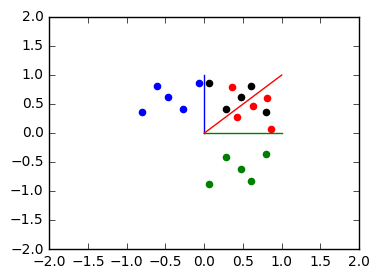

In [290]:
fig, ax = plt.subplots(figsize=(4, 3))

# add points
ax.scatter(*points, color='k')

# add lines
for start, end in zip(line_start_points.T, line_end_points.T):
    ax.plot(*list(zip(start, end)))

# set axes limits
_ = ax.set_xlim(-2, 2), ax.set_ylim(-2, 2)


R = get_reflection(points, line_start_points, line_vectors)


colors = ['b', 'g', 'r']
for m in range(3):
    for n in range(5):
        pts = R[:,n,m]
        ax.scatter(*pts, color=colors[m])

In [291]:
def get_reflection(points, line_points, line_vectors):
    
    # construct tiled vectors
    x = np.tile(points.reshape(points.shape[0], points.shape[1], 1), (1, 1, line_points.shape[1]))
    p = np.tile(line_points.reshape(line_points.shape[0], 1, line_points.shape[1]), (1, points.shape[1], 1))
    d = np.tile(line_vectors.reshape(line_vectors.shape[0], 1, line_vectors.shape[1]), (1, points.shape[1], 1))

    # instantiate dot operation
    dot = lambda a, b: np.einsum("ijk, ijk->jk", a, b)

    # compute projections NEGATIVE??????
    constants = dot(x-p, d) / dot(d, d)
    A = p + d*np.tile(constants.reshape(1, constants.shape[0], constants.shape[1]), reps=(2, 1, 1))

    #compute reflections
    R = 2*A - x
    
    return R